In [3]:
!pip install praw

In [12]:
import praw
import pandas as pd
import seaborn as sns
import numpy as np

#enter your credentials
username=""
client_id=""
client_secret=""
password=""

reddit_instance=praw.Reddit(
    username=username,
    client_id=client_id,
    client_secret=client_secret,
    password=password,
    user_agent="test_bot"
)

#print(reddit_instance.user.me())
subreddit = reddit_instance.subreddit("testingground4bots")
#to verify that you're connected
print(subreddit)

testingground4bots


In [13]:
import pandas as pd
df=pd.DataFrame()
titles=[]
scores=[]
ids=[]

In [14]:
posts=subreddit.hot(limit=100)
for post in posts:
    titles.append(post.title)
    scores.append(post.score) #upvotes
    ids.append(post.id)
df['Id']=ids   
df['Titles'] = titles
df['Upvotes'] = scores
df = df.sort_values(by=['Upvotes'])
print(df)

         Id                                             Titles  Upvotes
0   1l01745                                        Great post!        1
69  1kp38sb       Default H1 - LLM Response Invalid or Missing        1
68  1kp399b       Default H1 - LLM Response Invalid or Missing        1
67  1kp39pr       Default H1 - LLM Response Invalid or Missing        1
66  1kp3a60       Default H1 - LLM Response Invalid or Missing        1
..      ...                                                ...      ...
37  1kqjrcf                                         Hello test        2
88  1kmfk08  Databricks Acquires Neon for $1B to Supercharg...        2
97  1klzvz0  GenAI Attack Chains: The Dual Role of AI in Cy...        2
46  1kppyfn                                               test        2
85  1ko7so7                                               test        3

[100 rows x 3 columns]


In [15]:
df.head()

,Id,Titles,Upvotes
0,1l01745,Great post!,1
69,1kp38sb,Default H1 - LLM Response Invalid or Missing,1
68,1kp399b,Default H1 - LLM Response Invalid or Missing,1
67,1kp39pr,Default H1 - LLM Response Invalid or Missing,1
66,1kp3a60,Default H1 - LLM Response Invalid or Missing,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 85
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Id       100 non-null    object
 1   Titles   100 non-null    object
 2   Upvotes  100 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.1+ KB


In [17]:
df = df.sort_values(by=['Upvotes'], ascending=True)
df.head(10)

,Id,Titles,Upvotes
0,1l01745,Great post!,1
10,1kwdnij,Testing a new bot feature! 🤖,1
1,1kzw05w,Test,1
2,1kz99uk,Content only,1
3,1kyy3b3,F1 Graph,1
4,1kyy0jh,F1 Graph,1
5,1kyxx9j,F1 Graph,1
6,1kydts2,Great post!,1
7,1kxg2jv,"test, check 1, 2 3",1
8,1kwps4y,Test your bot here! 🤖 25 characters,1


In [18]:
df1 = df.copy()

In [19]:
df1.head()

,Id,Titles,Upvotes
0,1l01745,Great post!,1
10,1kwdnij,Testing a new bot feature! 🤖,1
1,1kzw05w,Test,1
2,1kz99uk,Content only,1
3,1kyy3b3,F1 Graph,1


In [20]:
df1['Popularity Score'] = df1.loc[df['Upvotes']==0] = "new"

In [21]:
df1['Popularity Score'] = df1.loc[df['Upvotes']>10] = "great"

In [22]:
df1['Popularity Score'] = df1.loc[df['Upvotes']>100] = "hot"

In [23]:
df1['Popularity Score'] = df1.loc[df['Upvotes']>1000] = "best"

In [24]:
df1.head()

,Id,Titles,Upvotes,Popularity Score
0,1l01745,Great post!,1,best
10,1kwdnij,Testing a new bot feature! 🤖,1,best
1,1kzw05w,Test,1,best
2,1kz99uk,Content only,1,best
3,1kyy3b3,F1 Graph,1,best


<Axes: xlabel='Upvotes', ylabel='Popularity Score'>

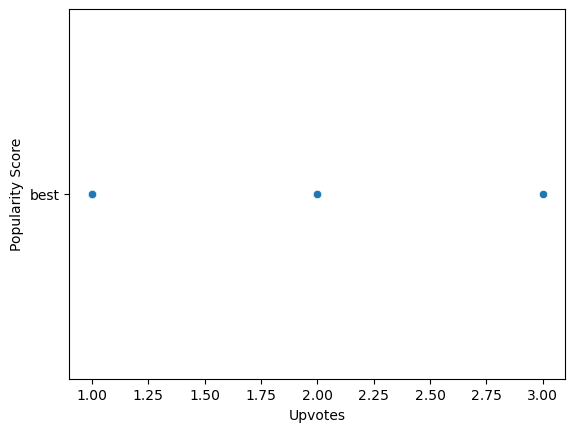

In [37]:
sns.scatterplot(x=df1["Upvotes"], y=df1["Popularity Score"], data=df1)

In [25]:
type(df1)

pandas.core.frame.DataFrame

In [26]:
df1.shape

(100, 4)

In [27]:
df.tail()

,Id,Titles,Upvotes
46,1kppyfn,test,2
37,1kqjrcf,Hello test,2
88,1kmfk08,Databricks Acquires Neon for $1B to Supercharg...,2
97,1klzvz0,GenAI Attack Chains: The Dual Role of AI in Cy...,2
85,1ko7so7,test,3


In [28]:
df.tail(20)

,Id,Titles,Upvotes
80,1kow486,Article,1
73,1kp2ghp,Default H1 - Review LLM Output,1
82,1kow31i,Article,1
83,1kow2gg,Article,1
81,1kow3l1,Article,1
86,1koe2kj,Silicon Valley’s Growing Influence in Washingt...,1
87,1knnera,Test Post,1
89,1kmj3on,DeepMind AlphaEvolve AI: Revolutionizing Math ...,1
90,1kmj32k,AlphaEvolve AI Breakthrough: Google’s Self-Cod...,1
91,1kmj2gr,AlphaEvolve AI Agent Surpasses Human Expertise...,1


In [29]:
def word_count(df, column):
    dictionary={}
    for idx, row in df.iterrows():
        split = row[column].lower().split(" ")
        for word in split:
            if word in dictionary:
                dictionary[word] += 1
            else:
                dictionary[word] = 1
    dictionary = pd.Series(dictionary)
    dictionary = dictionary.sort_values(ascending=False)
    return dictionary

top_counts = word_count(df, "Titles")
top_counts[0:10]

-           28
llm         27
h1          27
default     27
response    20
or          20
invalid     20
missing     20
test        16
this        11
dtype: int64